In [13]:
# from jgraph import *
import networkx as nx
import random
import os,sys
import time
import subprocess
from infomap import Infomap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:

def clique(g, size, idx, num_nodes):
  for i in range(idx,num_nodes-1):
    for j in range(idx - size,idx):
      g[i,j] = 0

In [15]:
def Print(g,num_nodes):
  G = nx.Graph()
  for i in range(num_nodes):
    G.add_node(i)
  for i in range(num_nodes):
    for j in range(i+1, num_nodes):
      if g[i,j] == 1:
        G.add_edge(i,j)
  nx.draw(G, with_labels=True)

In [16]:
def walktrap(g):
  k = g.community_walktrap()
  k = k.as_clustering()
  print(k)

In [17]:
def infomap(g):
  k = g.community_infomap()
  print(k)

In [18]:
def hub_node(clq):
    num_nodes = int((clq*(clq+1))/2) + 1
    g = Graph.Full(num_nodes)
    size = 0
    for i in range(clq,1,-1):
        size = size + i
        clique(g,i,size,num_nodes)
    walktrap(g)
    Print(g, num_nodes)
    infomap(g)

In [19]:
def hub_node2(clq):
    num_nodes = int(clq*(clq+1)) + 1
    g = Graph.Full(num_nodes)
    size = 0
    for i in range(clq,1,-1):
        size = size + i
        clique(g,i,size,num_nodes)
        size = size + i
        clique(g,i,size,num_nodes)
    g[num_nodes-2, num_nodes-3] = 0
    walktrap(g)
    Print(g, num_nodes)
    infomap(g)

In [20]:
def alt_hub_node(clq):
    num_nodes = int((clq+1)*(clq+1)/4) + 1
    g = Graph.Full(num_nodes)
    size = 0
    for i in range(clq,1,-2):
        size = size + i
        clique(g,i,size,num_nodes)
    walktrap(g)
    Print(g, num_nodes)
    infomap(g)

In [21]:
def creat_random_connected(offset,size,number_of_edges = 100000000):

    edges = []
    for i in range(size-1):
        edges.append((offset + i,offset + i + 1))
    edges.append((offset,offset + size - 1))
    ret_edges = edges[:];
    
    edges = []
    for i in range(size):
        for j in range(i + 1,size):
            if((offset + i,offset + j) not in ret_edges):
                edges.append((offset + i,offset + j))

    last = len(edges)-1
    for i in range(min(number_of_edges,len(edges))):
        ind = random.randint(0,last)
        ret_edges.append(edges[ind])
        tmp = edges[ind]
        edges[ind] = edges[last]
        edges[last] = tmp
        last -= 1
    return ret_edges

In [22]:
def ring_of_clique(ring_size , clique_size):

    total_vert = ring_size*clique_size;

    edges = creat_random_connected(0,clique_size);import random

    offset = clique_size
    prev_connector = offset - 1

    for i in range(ring_size - 1):
        new_clique = creat_random_connected(offset,clique_size);
        new_clique.append((prev_connector,offset))
        edges.extend(new_clique)
        offset += clique_size
        prev_connector += clique_size

    edges.append((0,prev_connector))

    return [total_vert, edges]


In [23]:
def line_star_graph(total_vert, line_length):
    edges = []

    for i in range(1,line_length):
        edges.append((i-1,i))

    middle_node = line_length//2
    rem_vert = total_vert - line_length
    offset = line_length

    for i in range(rem_vert):
        edges.append((middle_node,offset + i))

    return [total_vert, edges]

In [24]:
def run_louvain(total_vert,edges):
                
    g = Graph()
    g.add_vertices(total_vert)
    g.add_edges(edges)
    
#     Print(g,total_vert)
    
    part = louvain.find_partition(g, louvain.ModularityVertexPartition);
    print(part)
    return part

In [25]:
def run_maxperm(total_vert, edges):
    
    g = Graph()
    g.add_vertices(total_vert)
    g.add_edges(edges)
    
    input_file = open("input.dat", "w")
    input_file.write(str(g.vcount()) + " " + str(g.ecount()) + "\n")
    for i in g.es:
        m1 = i.tuple[0]
        m2 = i.tuple[1]
        input_file.write(str(m1) + " " + str(m2) + "\n")
#         input_file.write(str(m2) + " " + str(m1) + "\n")
    input_file.close()
    
    returned_value = subprocess.check_output("bash compile.sh", shell = True)
    returned_value = returned_value.decode("utf-8")
    
    #print(returned_value)
    
    output_file = open("output.txt","r")
    partitions = output_file.readlines() 

    dicti={}
    for line in partitions[2:]:
        #print(line.strip())
        pair = line.split('\t')
        pair = list(map(int,pair))
        if pair[1] in dicti:
            dicti[pair[1]].append(pair[0])
        else:
            dicti[pair[1]] = [pair[0]]
    
    print("total partitions : " + str(len(dicti.keys())) )
    for i in dicti.keys():
        print ("[" + str(i) + "] : "),
        print(list(dicti[i]))
    return dicti
    

In [26]:
def hub_surr_cliq(total_number_of_cliq,list_of_sizes):
    
    total_vert = sum(list_of_sizes) + 1
    offset = 1
    edges = []
    
    for i in range(total_number_of_cliq):
        edges.append((0,offset))
        edges.extend(creat_random_connected(offset,list_of_sizes[i]))
        offset += list_of_sizes[i]
        
    return [total_vert,edges]
def hub_surr_cliq2(total_number_of_cliq,list_of_sizes):
    
    total_vert = sum(list_of_sizes) + 1
    offset = 1
    edges = []
    for i in range(1,total_vert):
        edges.append((0,i))
    for i in range(total_number_of_cliq):
        edges.append((0,offset))
        edges.extend(creat_random_connected(offset,list_of_sizes[i]))
        offset += list_of_sizes[i]
        
    return [total_vert,edges]


In [27]:
def comm_surr_comm(middle_size,outer_size,count_outer,beta):
    edges = []

    if(middle_size < count_outer):
        print("add more vertices to middle comm")
        return None

    g = Graph()
    total_vert = count_outer*outer_size + middle_size
    g.add_vertices(total_vert)

    edges.extend(creat_random_connected(0,middle_size))
    
    offset = middle_size
    for i in range(count_outer):
        edges.extend(creat_random_connected(offset,outer_size))
        beta1 = beta
        for j in range(offset,offset + outer_size):
            if(beta1 == 0):
                break
            beta1 -= 1
            edges.append((i,j))
        offset += outer_size

    return [total_vert,edges]


In [28]:
def hub_node_graph(left_size,right_size):
    edges = []

#     g = Graph()
    total_vert = left_size + right_size + 1
#     g.add_vertices(total_vert)
    
    hub_node = 0
    offset_right = left_size + 1
    
    edges.extend(creat_random_connected(0,left_size + 1))
    edges.extend(creat_random_connected(offset_right,right_size))

    for i in range(right_size):
        edges.append((0,offset_right + i));
#     print(edges)
#     g.add_edges(edges)
    return [total_vert, edges]


In [29]:
def ring_of_clique_temp(ring_size , clique_list):

    total_vert = sum(clique_list);

    edges = creat_random_connected(0,clique_list[0]);

    offset = clique_list[0]
    prev_connector = offset - 1

    for i in range(1,ring_size):
        new_clique = creat_random_connected(offset,clique_list[i]);
        new_clique.append((prev_connector,offset))
        edges.extend(new_clique)
        offset += clique_list[i]
        prev_connector += clique_list[i]

    edges.append((0,prev_connector))

    return [total_vert, edges]

In [30]:
def run_infomap(total_vert,edges):
    im = Infomap("--two-level --directed")
#     im.add_link(0, 1)
    for i in edges:
        im.addLink(i[0],i[1])
        im.addLink(i[1],i[0])
    im.run()
    sets = {}

#     print("Found " + str(im.num_top_modules)+ " modules with codelength: " + str(im.codelength))
    print("Result")
    print("\n#node module")
    for node in im.tree:
        if node.is_leaf:
            if(node.module_id in sets):
                sets[node.module_id].append(node.node_id)
            else:
                sets[node.module_id] = [node.node_id]
            print(node.node_id, node.module_id)
    print("total partitions : " + str(len(sets.keys())) )
    for i in sets.keys():
        print ("[" + str(i) + "] : "),
        print(sets[i])
        
    g = Graph()
    g.add_vertices(total_vert)
    g.add_edges(edges)
    Print(g,total_vert)

In [31]:
def hub_node_generic(x,y,alpha,beta):
    total_vert = x + y + 1;
    x,y = y,x
    alpha,beta = beta,alpha
    x = x + alpha
    y = y + beta
    edges = creat_random_connected(1,y);
    offset = y + 1;
    edges.extend(creat_random_connected(offset,x));

    for i in range(1,y + 1):
        if(beta == 0):
            break
        edges.append((0,i))
        beta -= 1
    for i in range(y + 1,y + x + 1):
        if(alpha == 0):
            break
        edges.append((0,i))
        alpha -= 1

    return [total_vert, edges]

In [32]:
def run_label_prop(total_vert,edges):
    G = nx.Graph()
    G.add_nodes_from(range(total_vert))
    G.add_edges_from(edges)
    nx.draw_networkx(G)
    return nx.algorithms.community.label_propagation.asyn_lpa_communities(G)

In [33]:
def comm_surr_comm(middle_size,outer_size,count_outer,beta):
    edges = []

    if(middle_size < count_outer):
        print ("add more vertices to middle comm")
        return None

    total_vert = count_outer*outer_size + middle_size

    edges.extend(creat_random_connected(0,middle_size))
    
    offset = middle_size
    for i in range(count_outer):
        edges.extend(creat_random_connected(offset,outer_size))
        beta1 = beta
        for j in range(offset,offset + outer_size):
            if(beta1 == 0):
                break
            beta1 -= 1
            edges.append((i,j))
        offset += outer_size

    return [total_vert,edges]


Community 0:  {0, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80}
Community 1:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


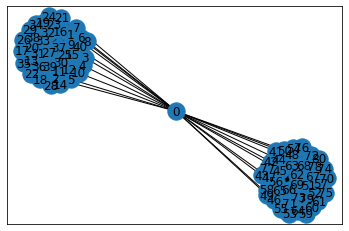

In [34]:
graph = hub_node_generic(30,30,10,10)
part = run_label_prop(graph[0],graph[1])
cnt = 0
for i in part:
    print("Community " + str(cnt) + ": ",i)
    cnt += 1

Community 0:  {0, 33, 32, 34}
Community 1:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


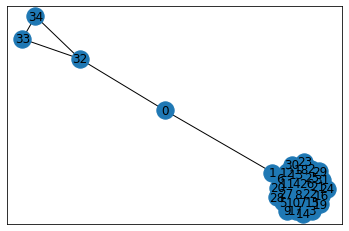

In [35]:
graph = hub_node_generic(30,2,1,1)
part = run_label_prop(graph[0],graph[1])
cnt = 0
for i in part:
    print("Community " + str(cnt) + ": ",i)
    cnt += 1

Community 0:  {0, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56}
Community 1:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


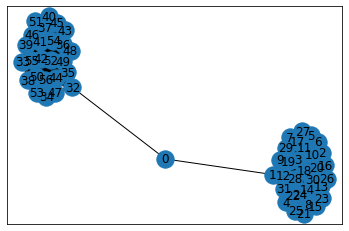

In [36]:
graph = hub_node_generic(30,24,1,1)
part = run_label_prop(graph[0],graph[1])
cnt = 0
for i in part:
    print("Community " + str(cnt) + ": ",i)
    cnt += 1

Community 0:  {0, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Community 1:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}


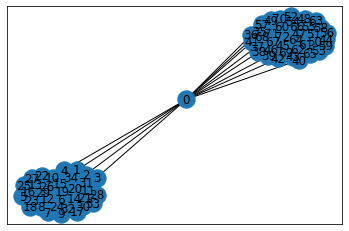

In [37]:
graph = hub_node_generic(30,30,4,8)
part = run_label_prop(graph[0],graph[1])
cnt = 0
for i in part:
    print("Community " + str(cnt) + ": ",i)
    cnt += 1

Community 0:  {0, 1, 2}
Community 1:  {3, 4, 5}
Community 2:  {8, 6, 7}
Community 3:  {9, 10, 11}
Community 4:  {12, 13, 14}
Community 5:  {16, 17, 15}
Community 6:  {18, 19, 20}
Community 7:  {21, 22, 23}
Community 8:  {24, 25, 26}
Community 9:  {27, 28, 29}
Community 10:  {32, 33, 34, 35, 30, 31}
Community 11:  {36, 37, 38}
Community 12:  {40, 41, 39}
Community 13:  {42, 43, 44}
Community 14:  {45, 46, 47}
Community 15:  {48, 49, 50}
Community 16:  {51, 52, 53}
Community 17:  {56, 54, 55}
Community 18:  {57, 58, 59, 60, 61, 62}
Community 19:  {64, 65, 63}
Community 20:  {66, 67, 68}
Community 21:  {69, 70, 71}
Community 22:  {72, 73, 74}
Community 23:  {75, 76, 77}
Community 24:  {80, 78, 79}
Community 25:  {81, 82, 83}
Community 26:  {84, 85, 86}
Community 27:  {88, 89, 87}
Community 28:  {90, 91, 92}
Community 29:  {93, 94, 95}
Community 30:  {96, 97, 98}
Community 31:  {99, 100, 101}
Community 32:  {104, 102, 103}
Community 33:  {105, 106, 107, 108, 109, 110}
Community 34:  {112, 

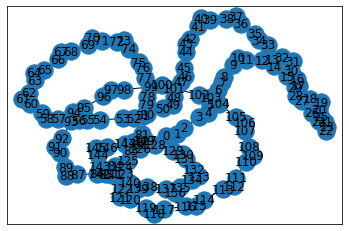

In [38]:
graph = ring_of_clique(50,3)
part = run_label_prop(graph[0],graph[1])
cnt = 0
for i in part:
    print("Community " + str(cnt) + ": ",i)
    cnt += 1

Community 0:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Community 1:  {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Community 2:  {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
Community 3:  {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}
Community 4:  {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
Community 5:  {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
Community 6:  {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}
Community 7:  {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
Community 8:  {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}
Community 9:  {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}


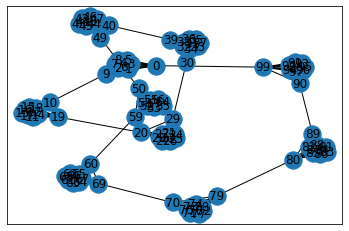

In [39]:
graph = ring_of_clique(10,10)
part = run_label_prop(graph[0],graph[1])
cnt = 0
for i in part:
    print("Community " + str(cnt) + ": ",i)
    cnt += 1

Community 0:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Community 1:  {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Community 2:  {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
Community 3:  {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}
Community 4:  {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
Community 5:  {50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
Community 6:  {64, 65, 66, 67, 68, 69, 60, 61, 62, 63}
Community 7:  {70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
Community 8:  {80, 81, 82, 83, 84, 85, 86, 87, 88, 89}
Community 9:  {96, 97, 98, 99, 90, 91, 92, 93, 94, 95}


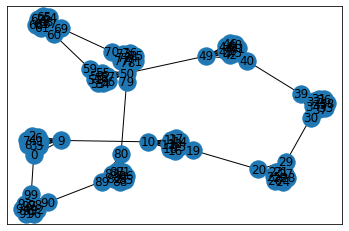

In [40]:
graph = ring_of_clique(10,10)
part = run_label_prop(graph[0],graph[1])
cnt = 0
for i in part:
    print("Community " + str(cnt) + ": ",i)
    cnt += 1

Community 0:  {0, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
Community 1:  {32, 1, 33, 34, 35, 36, 37, 38, 39, 30, 31}
Community 2:  {2, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
Community 3:  {3, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
Community 4:  {64, 65, 66, 67, 4, 68, 69, 60, 61, 62, 63}
Community 5:  {5, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
Community 6:  {6, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89}
Community 7:  {96, 97, 98, 99, 7, 90, 91, 92, 93, 94, 95}
Community 8:  {100, 101, 102, 103, 8, 104, 105, 106, 107, 108, 109}
Community 9:  {9, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119}
Community 10:  {128, 129, 10, 120, 121, 122, 123, 124, 125, 126, 127}
Community 11:  {130, 131, 132, 133, 134, 135, 136, 137, 138, 11, 139}
Community 12:  {140, 12, 141, 142, 143, 144, 145, 146, 147, 148, 149}
Community 13:  {13, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159}
Community 14:  {160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 14}
Community 15:  {170, 171, 172, 173, 174, 15, 175, 

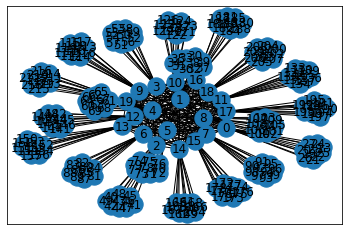

In [41]:
graph = comm_surr_comm(20,10,20,10)
part = run_label_prop(graph[0],graph[1])
cnt = 0
for i in part:
    print("Community " + str(cnt) + ": ",i)
    cnt += 1
print("total ",cnt," communities were identified")